

# Project: tmdb movie data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I am preferring this dataset for analysis, reason being I really love to watch movies. I love to go dive deep into the ocean of genre of movies.

## The insights I am looking forward to draw are:
1. What genres are the most popular among the movies made?
 
2. What are the deciding factor to determine movie success in terms of profit? Is it the budget or the release timing or the popularity or the runtime or the vote average or the combination of all of them?


In [1]:
# Use this cell to set up import statements for all of the packages that you

import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import pandas as pd
import numpy as np                                                   
import datetime                                                      # while dealing with date and time
%matplotlib inline

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


The above dataset shows that there are both budget and budget adjusted, and revenue and revenue adjusted column. But only one coloumn is suffiecient to draw insights.

Getting information about our dataset always helps to get an idea for cleaning process.

In [3]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

The release date is marked as object instead of datetime, we may need to convert it later. The genres and production company has small number of null value. In this case we might remove the row that contains the null value. Also, some columnS like homepage has huge number of null value. Instead of removing row that has the null value, which will result in data loss we might consider removing the homepage column itself as it contains on few values.

In [5]:
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

Based on the previous two statistic that show the number of non null values and unique values in each column, we can see that several column have duplicate value such as the release_year and cast. It is because in such column, the number of non null value is bigger than the number of unique value.

Let's try to get more statistics regarding every column. As we can see below, there are several weird values such as budget and revenue of 0 which are not so possible, especially for the budget_adj. Let's drop those rows on the next section.

### There are several data cleaning task that we have to do before we proceed to analyse the data:

Remove columns that are not needed for the analysis, such as the imdb_id, budget, revenue, homepage, keywords, overview. Budget and revenue will not be used as we can use the budget adjusted and revenue adjusted instead.

Drop duplicated row, keeping only its first appearance.

Drop rows where the budget or revenue adjusted value is 0

Drop row that have no genre and production companies information since it is small compared to the total number of data we have.

Change the release_date into datetime data type.

Notice that there are pipes sign for the director, genre, and cast column. I initially thought we should separate the value among the pipe into multiple rows for each of the column. However, it will make the data way bigger than it is now if we do it that way and we would need to do grouping often since one movie could appear in multiple rows if it has more than one director, genre or cast column. Thus, let's keep it like this and handle it when we would like to plot it.

In [6]:
df.drop(['imdb_id', 'budget', 'revenue', 'homepage', 'keywords', 'overview', 'director','tagline'], axis=1, inplace=True)

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.drop(df[(df.budget_adj == 0)].index, inplace=True)

In [9]:
df.dropna(inplace=True, subset=['genres', 'production_companies'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5032 entries, 0 to 10865
Data columns (total 13 columns):
id                      5032 non-null int64
popularity              5032 non-null float64
original_title          5032 non-null object
cast                    5024 non-null object
runtime                 5032 non-null int64
genres                  5032 non-null object
production_companies    5032 non-null object
release_date            5032 non-null object
vote_count              5032 non-null int64
vote_average            5032 non-null float64
release_year            5032 non-null int64
budget_adj              5032 non-null float64
revenue_adj             5032 non-null float64
dtypes: float64(4), int64(4), object(5)
memory usage: 550.4+ KB


In [11]:
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')

Comparing release date and release year.

In [12]:
(df['release_date'].dt.year == df['release_year']).all()

False

Why did that happen? Let's try to find out.

In [13]:
df.release_date.dt.year.describe(), df.release_year.describe()

(count    5032.000000
 mean     2003.404809
 std        13.961517
 min      1969.000000
 25%      1996.000000
 50%      2005.000000
 75%      2011.000000
 max      2068.000000
 Name: release_date, dtype: float64, count    5032.000000
 mean     2001.139308
 std        11.848320
 min      1960.000000
 25%      1995.000000
 50%      2004.000000
 75%      2010.000000
 max      2015.000000
 Name: release_year, dtype: float64)

It seems like the year, if it is between 0-68 will get converted to 20xx. However, if it is greater than equal to 69, it will get converted to the 19s. Let's fix it by using the year from the release year instead.

In [15]:
# a temp variable to hold the correct value
temp = pd.to_datetime({'year': df['release_year'], 'month': df['release_date'].dt.month, 'day': df['release_date'].dt.day})

# checking
print((temp.dt.month == df['release_date'].dt.month).all(),
(temp.dt.day == df['release_date'].dt.day).all(),
(temp.dt.year == df['release_year']).all())

True True True


Assigning variable back

In [16]:
df['release_date'] = temp

<a id='eda'></a>
## Exploratory Data Analysis



### Creating a function to lower down the redundancy

In [17]:
def get_mean_profit_after_grouping_by_column(df, group_by_col):
    return df.groupby(group_by_col).mean()['profit']    
def get_median_profit_after_grouping_by_column(df, group_by_col):
    return df.groupby(group_by_col).median()['profit']

def set_label(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

### Question 1: What are the most popular genres?

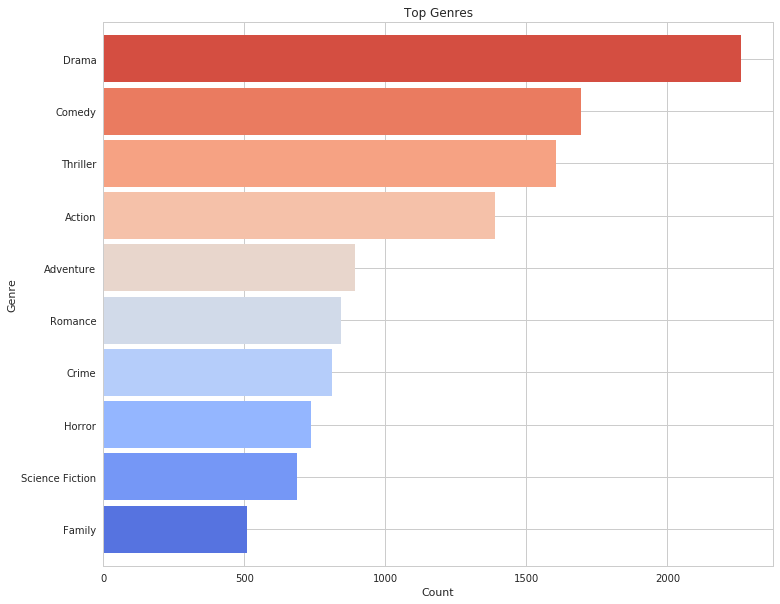

In [18]:
# Separating genre based on the pipe (|).
genresList = df['genres'].str.split('|')

# making list of genres
genres = []
for i in genresList:
    genres.extend(i)
    

plt.subplots(figsize=(12,10))
pd.Series(genres).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('coolwarm',10))
plt.title('Top Genres')
set_label('Count', 'Genre')
plt.show()

By going through the above graph we can say that Drama is the mostly preferred genre on the basis of count and Family is the least preferred genre.

### Question 2: What are the deciding factor to determine movie success in terms of profit? Is it the budget or the release timing or the popularity or the runtime or the vote average or the combination of all of them?
Let's first get the profit value by subtracting budget_adj from revenue_adj.

In [19]:
# fetching the values of profit
df['profit'] = df['revenue_adj'] - df['budget_adj']

Distribution of the profit.

In [20]:
df.profit.describe()

count    5.032000e+03
mean     6.718297e+07
std      1.763396e+08
min     -4.139124e+08
25%     -8.005555e+06
50%      4.669757e+06
75%      7.144782e+07
max      2.750137e+09
Name: profit, dtype: float64

25% of the movie did not make profit.

Plotting a scatter plot between budget and profit to to find some correlation.

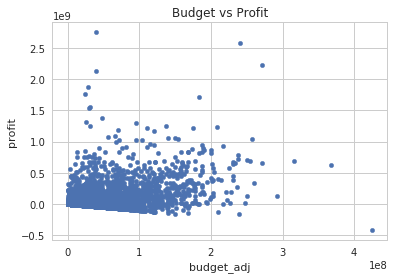

In [21]:
df.plot.scatter(x='budget_adj', y='profit', title='Budget vs Profit')

It gives us some rough ideal range of budget that is suitable to make a movie, it does not tell any strong correlation between profit and budget_adj. Also, if we ignore the outlier, there has been a steep decrease in profit when the budget increases.

Grouping the data based on the release year and finding the mean in each group. This may help to find a correlation between the release year and the profit.

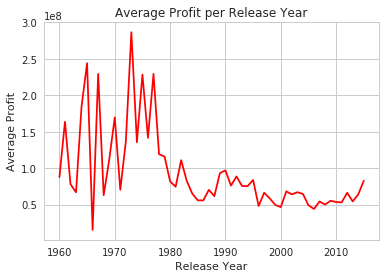

In [22]:
mean_profit_per_release_year = get_mean_profit_after_grouping_by_column(df, 'release_year')
mean_profit_per_release_year.plot(title='Average Profit per Release Year',color='red')
set_label('Release Year', 'Average Profit')

There seems to be a spike around 1970-1980 in terms of the profit made by movies.

After it, there seems to be a decrease of profit every year. Although mean may not be a suitable measure since mean can be affected by outliers.

We'll try drawing a scatter plot to see if there is an outlier in the data.

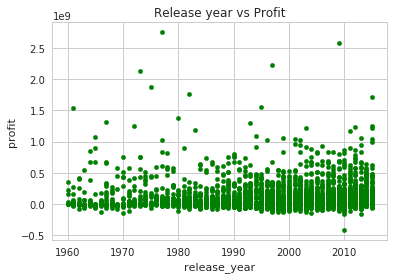

In [23]:
df.plot.scatter(x='release_year', y='profit', title='Release year vs Profit',color='green')

As we can see, there seems to be an outlier that might affect the mean.

Now we will try using median to get an idea of how the profit changes over the year.

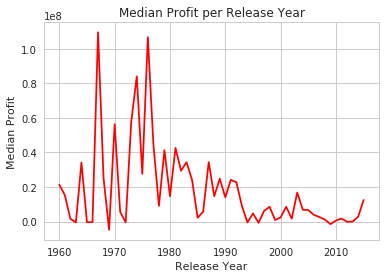

In [24]:
median_profit_per_release_year =  get_median_profit_after_grouping_by_column(df, 'release_year')
median_profit_per_release_year.plot(title='Median Profit per Release Year',color='red')
set_label('Release Year', 'Median Profit')

The movies released from year 1970 to 1980 have earned the most money.

let's try to find a correlation between the movie released and the profit made. In other hand, does movie made on certain quarter get more attention and profit? This time, we are going to use mean as it may provide more insight regarding the seasonality.

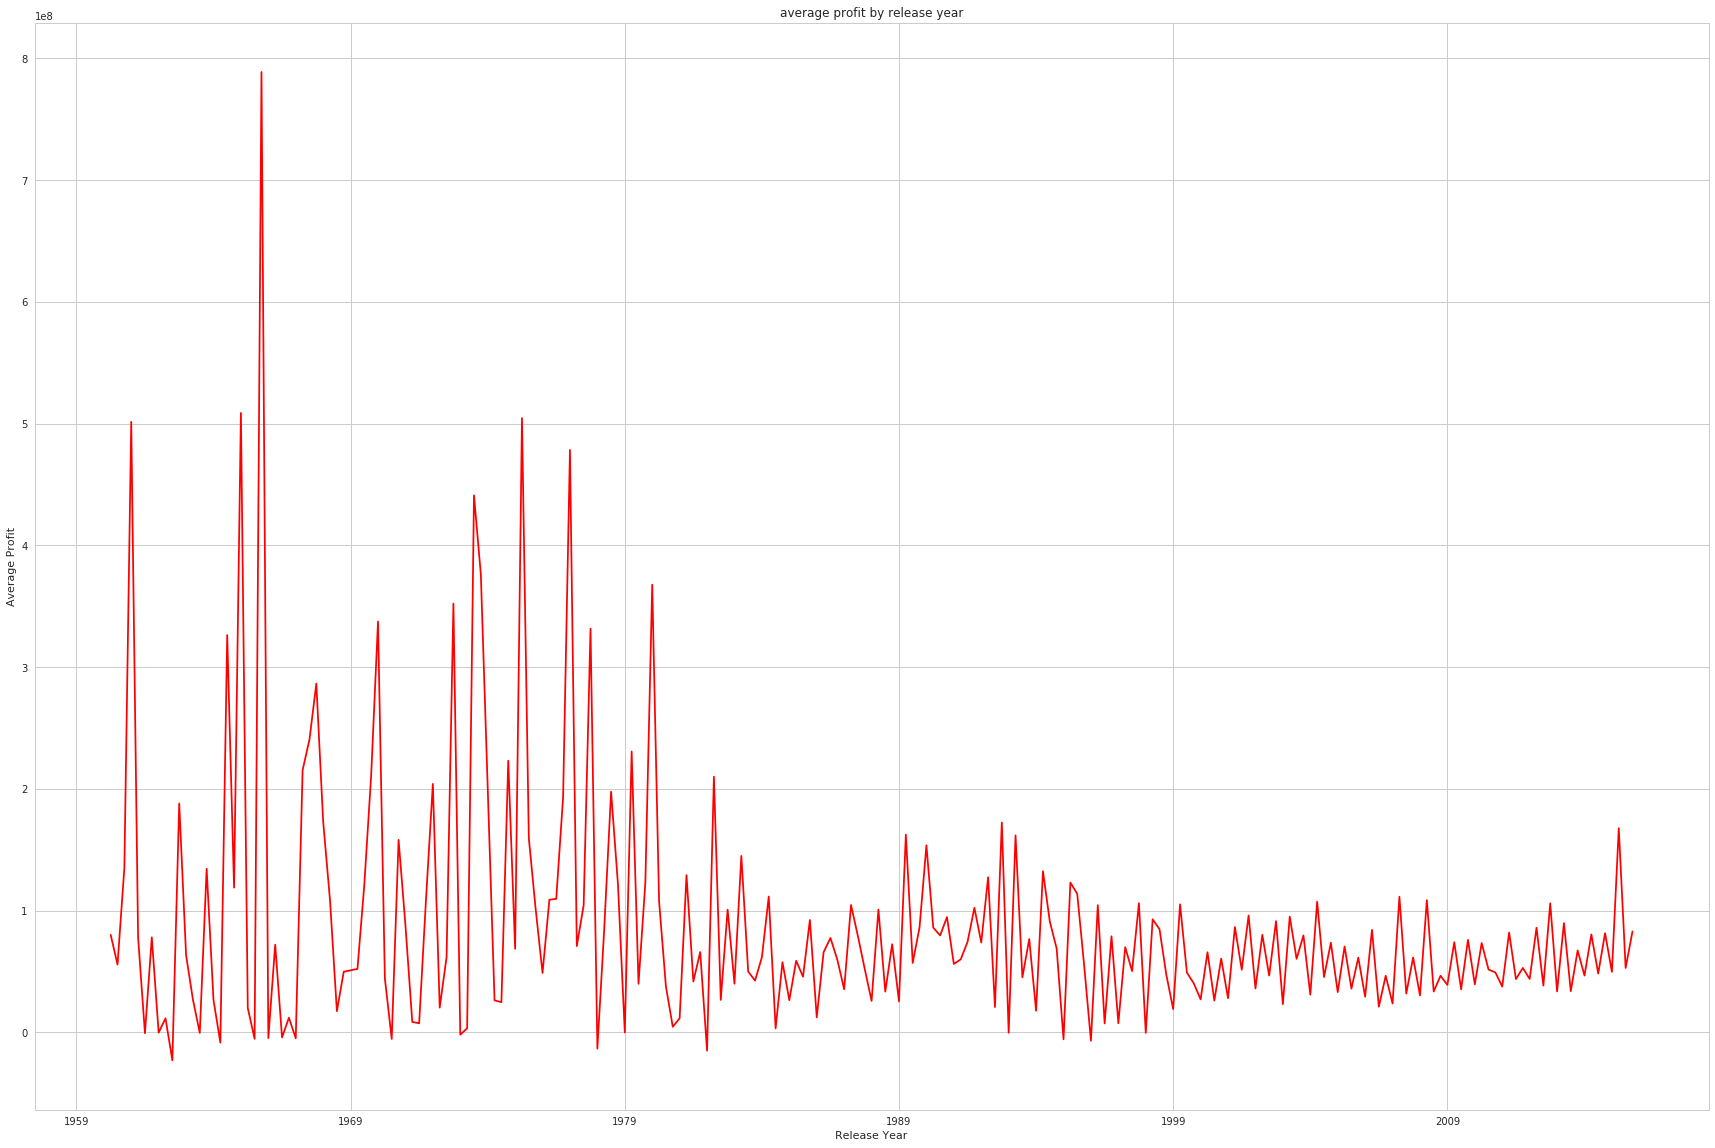

In [25]:
get_mean_profit_after_grouping_by_column(df, pd.PeriodIndex(df.release_date, freq='Q')).plot(figsize=(30,20),color='red', title='average profit by release year')
set_label('Release Year', 'Average Profit')

Seems like there is seasonality in the data and movies released on 2nd and 4th quarter of the year raised more profit. To see this more clearfully, we will plot the median of profit made by each movie in each quarter of the year, it eill be independent of the year.

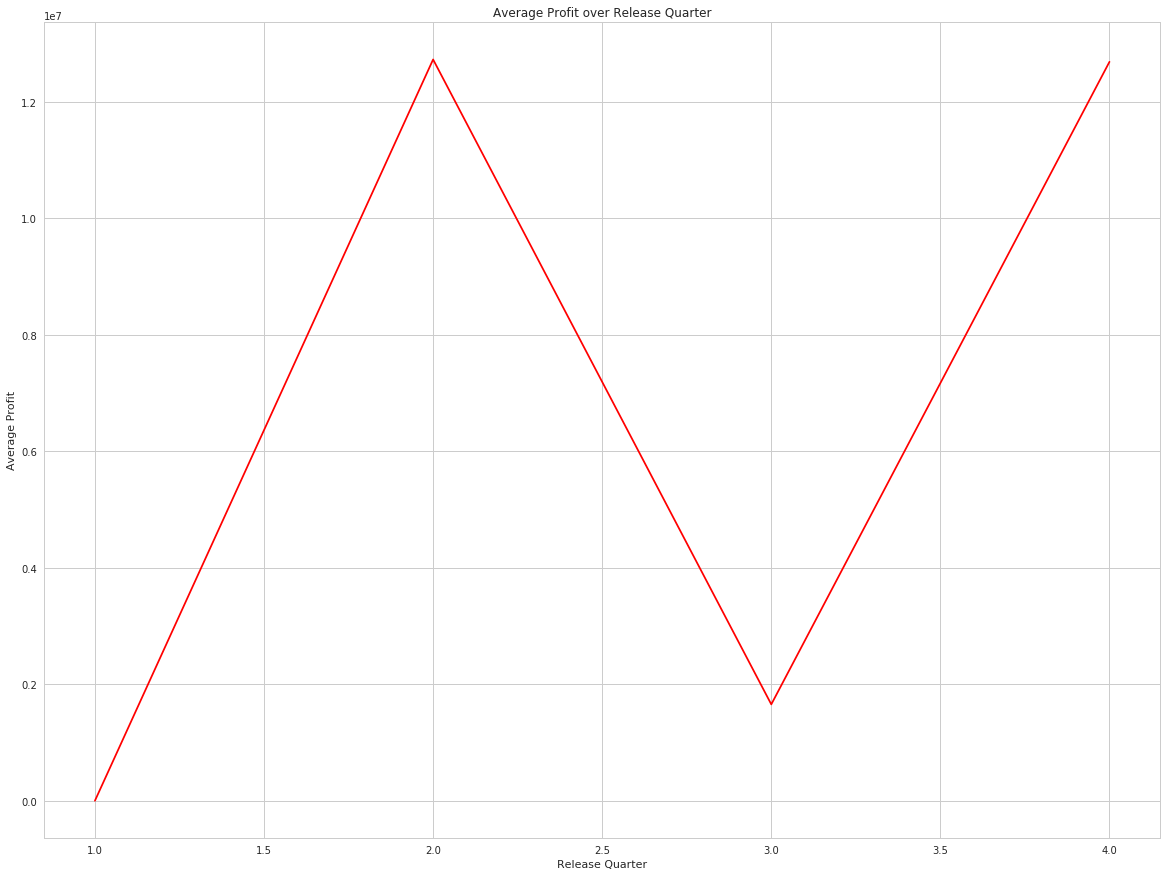

In [26]:
get_median_profit_after_grouping_by_column(df, df.release_date.dt.quarter).plot(
    figsize=(20,15),color='red',
    title='Average Profit over Release Quarter')
set_label('Release Quarter', 'Average Profit')

As we can see from above, movies released on 2nd and 4th quarter tend to profit more than those released in 1st and 3th quarter.

Let's now take a look on how the popularity relates to the profit.

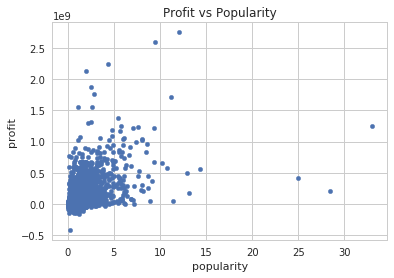

In [27]:
df.plot.scatter(x='popularity', y='profit', title='Profit vs Popularity')

Popularity has positive but correlation with the profit.

Relation of the runtime and profit.

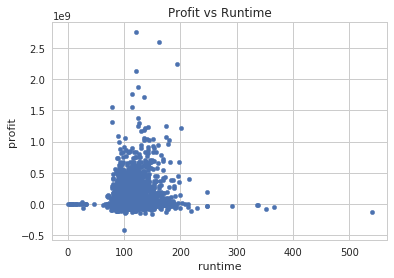

In [28]:
df.plot.scatter(x='runtime', y='profit', title='Profit vs Runtime')

We can say that the most suitable duration is less than 200 minutes. Infact it can be seen that the ideal movie runtime is somewhere in the range 90-140 minutes.

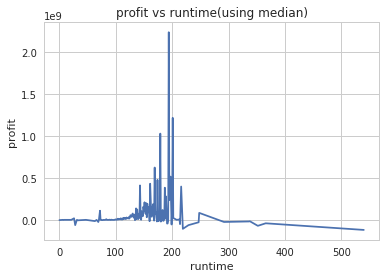

In [29]:
median_profit_per_runtime =  get_median_profit_after_grouping_by_column(df, 'runtime')
median_profit_per_runtime.plot(title='profit vs runtime(using median)')
set_label('runtime','profit')

Movies that have raised more profit tend to have around 200 minutes of runtime.

Relation between vote_average and the profit made will be drawn now.

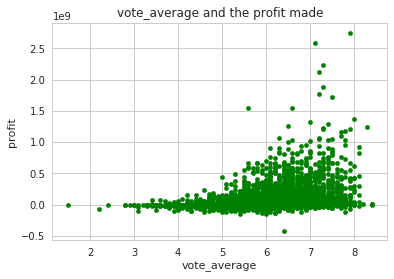

In [30]:
df.plot.scatter(x='vote_average', y='profit',color='green', title='vote_average and the profit made')

Vote and profit appear to be dirctly proportional to each other.

The correlation might not be linear since it seems like movies with vote average less than 4 tend to all receive similar profit.

<a id='conclusions'></a>
## Conclusions

### Genre
Popularity goes down in the following order:

DRAMA >
COMEDY >
THRILLER >
ACTION >
ADVENTURE >
ROMANCE >
CRIME >
HORROR >
SCIENCE FICTION >
FAMILY

### Profit 
There are many aspects that contribute to profit, they are as follows:
1. Higher budget has no impact on the profit earned.
2. Movies released between 1970 to 1980 earned more profit than any other decade.
3. Second and fourth quarter of any year seems to be more profitable.
4. The popularity does not affect the profit much. However, it seems like the vote does affect the profit.
5. Most popular movie duration is less than 200 minutes. It is the ideal duration where a movie made more money.

## Limitations

No doubt it was a great experience working on this dataseT, but there are some limitations which might affect the results and  I want to quote them:
1. The weird 0 value in the budget and revenue adjusted which should be explored further to find out that why it happened, whether the reeason for this 0 value could be mentioned for better exploratory analysis.
2. There is a lot variance in terms of the number of people who vote and the type of voters which are unknown using this data. Some columns are heavily unbalanced, such as the movie duration, which might affect the result.
3. More data could be added in this dataset for very crisp conclusions, such as the age group among which a particular movie was most popular or which movie had some restrictions for the viewers( like age restrictions) which can be helpful in concluding whether the producer should focus on restricted movie or not based upon their success analysis in terms of profit they generated.


In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0

## References
1. w3schools
2. dataschool
3. towardsdatascience
4. programiz